# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy as sc
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import t
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
# https://scipy-lectures.org/packages/statistics/auto_examples/plot_iris_analysis.html
# https://svaditya.github.io/oldblog/chi_square_and_t_tests_on_iris_data.html
# https://rpubs.com/Tanzir/Statistical-Analysis_IRIS-Data
# https://www.kaggle.com/bhagyashree12/anova-test-on-iris-dataset
# https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/
# https://medium.com/analytics-vidhya/exploratory-data-analysis-iris-dataset-4df6f045cda

# About Dataset
The iris flower data consists of 50 samples from 3 different species of iris flower namely setosa, versicolor and virginica. The dataset consists of 4 numerical/input features and 1 categorical feature/target variable. Input features are sepal length, sepal width, petal length and petal width whereas target variable is species.

<img src="https://dockship-images.s3.ap-south-1.amazonaws.com/fee135774b06bd091a8dafedbf2c5816">

## Loading Dataset

In [3]:
iris = datasets.load_iris()

In [4]:
iris.target_names # encoding scheme for species : 0=setosa, 1=versicolor and 2=virginica

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
X = iris.data
y = iris.target #integers representing the species

In [6]:
df_iris = pd.DataFrame(X, columns=['sepalLength','sepalWidth','petalLength','petalWidth'])
df_iris.head()

,sepalLength,sepalWidth,petalLength,petalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df2_iris = pd.DataFrame(y, columns=['species'])
df2_iris.head()

,species
0,0
1,0
2,0
3,0
4,0


In [8]:
iris = pd.concat([df_iris, df2_iris], axis=1)
iris.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Data Analysis and Visualization

## Dataset Information

In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepalLength  150 non-null    float64
 1   sepalWidth   150 non-null    float64
 2   petalLength  150 non-null    float64
 3   petalWidth   150 non-null    float64
 4   species      150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


- There is no null values in the dataset
- There are 150 instances and 4 attributes 

## Statistical Information

In [10]:
iris.describe()

,sepalLength,sepalWidth,petalLength,petalWidth,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


From this information, we can check statistical insight of Iris dataset (mean, median, min, max, std, etc.)

## Checking species column instances 

In [11]:
iris["species"].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

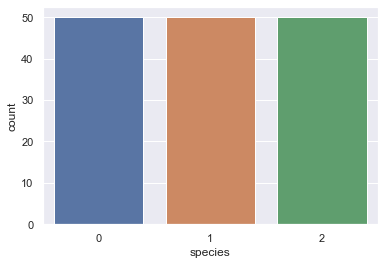

In [12]:
sns.countplot(x = iris["species"])

This dataset is a balanced dataset as every category has same number of instances

## Species based on sepal Length and Width

<AxesSubplot:title={'center':'Various species based on sapel length and width'}, xlabel='sepalLength', ylabel='sepalWidth'>

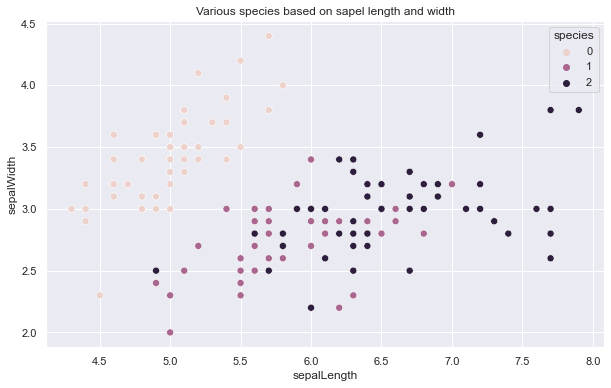

In [13]:
plt.figure(figsize=(10,6))
plt.title("Various species based on sapel length and width")
sns.scatterplot(x = iris["sepalLength"], y = iris["sepalWidth"],hue =iris["species"],s=50)

- 0 (Setosa) species has smaller sepal length but large sepal width
- 1 (Versicolor) is in almost middle phase in the plot
- 2 (Virginica) has larger sepal lengths and small sepal widths, which is just reversed of the setosa

## Species based on petal Length and Width

<AxesSubplot:title={'center':'Various species based on petal length and width'}, xlabel='petalLength', ylabel='petalWidth'>

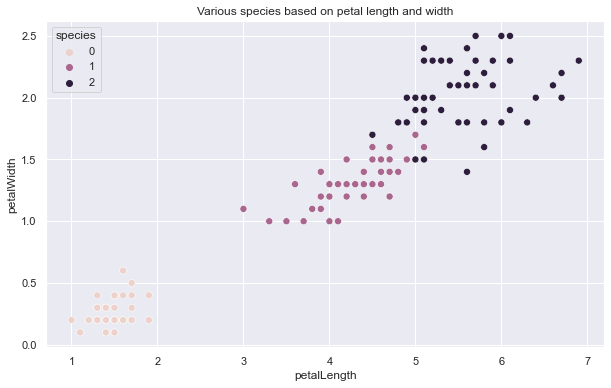

In [14]:
plt.figure(figsize=(10,6))
plt.title("Various species based on petal length and width")
sns.scatterplot(x = iris["petalLength"], y = iris["petalWidth"],hue =iris["species"],s=50)

- 0 (Setosa) species have the smallest petal length and width
- 1 (Versicolor) is also in the middle phase here
- 2 (Virginica) has the largest petal length and petal width

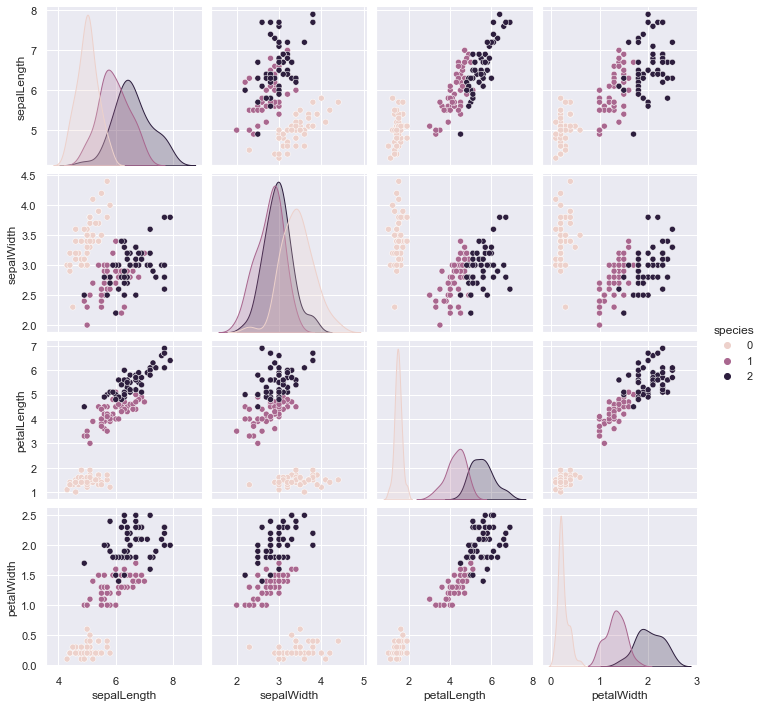

In [15]:
sns.pairplot(iris, hue="species")
plt.show()

From above we can infer:
- The distributions show there is very less overlapping in the petal length and petal width, so we can take them as classification features.
    - 0 (Setosa): sepal width is high, but sepal length, petal length and width is small
    - 1 (Versicolor): average petal and sepal dimensions
    - 2 (Virginica): petal length and width, sepal length is large, but sepal width is low
- There is a high correlation between petal length and petal width columns. We can look into the correlation more closely by plotting on a heatmap.

## Plotting Correlation

[]

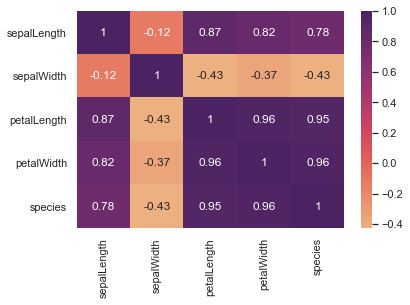

In [16]:
sns.heatmap(iris.corr(), annot=True, cmap='flare')
plt.plot()

- High positive correlation between petalWidth and petalLength (0.96)

- High positive correlation between petalLength and sepalLength (0.87)

- High positive correlation between petalWidth and sepalLength (0.82)

## Visualizing using Box plots 
Visualizing the distribution , mean and median using box plots

In [17]:
iris.groupby("species").agg(["mean", "median"])

sepalLength        sepalWidth        petalLength        petalWidth  \
               mean median       mean median        mean median       mean   
species                                                                      
0             5.006    5.0      3.428    3.4       1.462   1.50      0.246   
1             5.936    5.9      2.770    2.8       4.260   4.35      1.326   
2             6.588    6.5      2.974    3.0       5.552   5.55      2.026   

                
        median  
species         
0          0.2  
1          1.3  
2          2.0

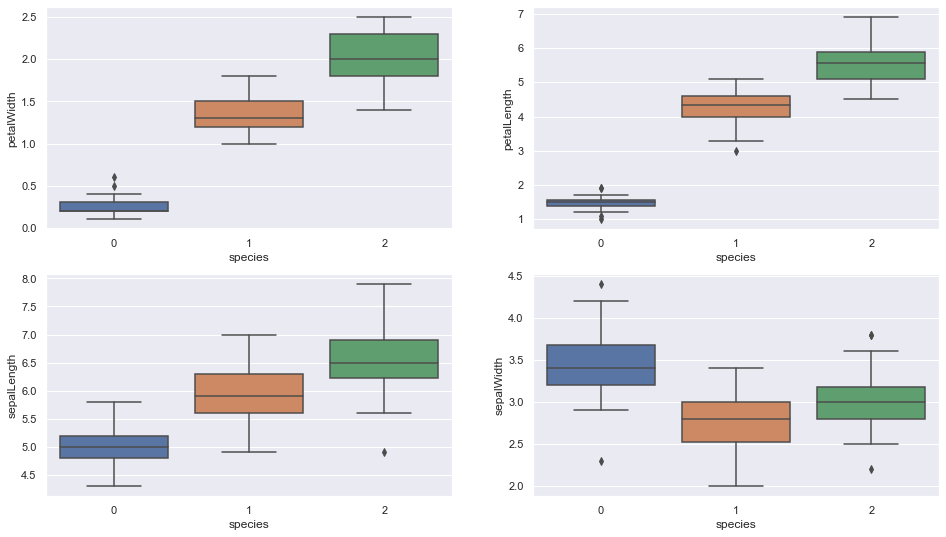

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(x= "species", y="petalWidth", data=iris, orient="v", ax=axes[0, 0])
sns.boxplot(x= "species", y="petalLength", data=iris, orient="v", ax=axes[0, 1])
sns.boxplot(x= "species", y="sepalLength", data=iris, orient="v", ax=axes[1, 0])
sns.boxplot(x= "species", y="sepalWidth", data=iris, orient="v", ax=axes[1, 1])
plt.show()

- 0 (Setosa): smaller features, less distributed
- 1 (Versicolor): average features, also distributed in a average manner
- 2 (Virginica): large no .of values and features, highly distributed 

## Visualizing using Histogram & Probability Density Function (PDF)

C:\Users\Nafisa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nafisa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nafisa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

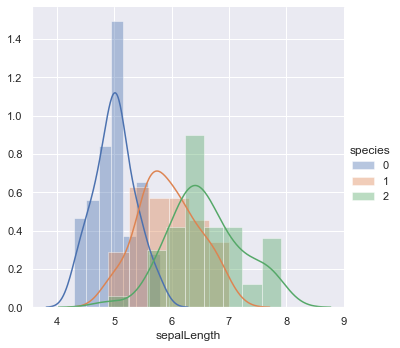

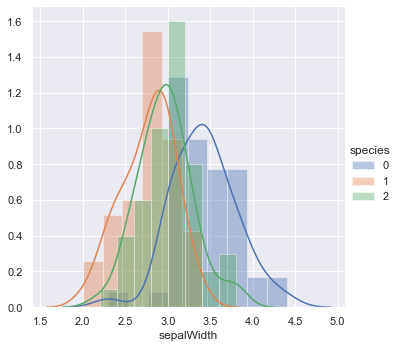

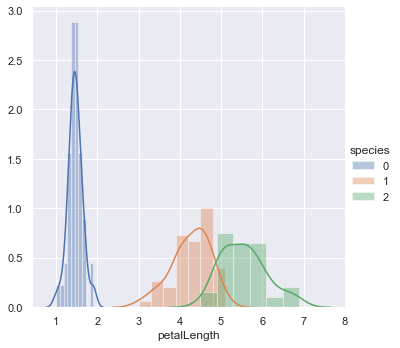

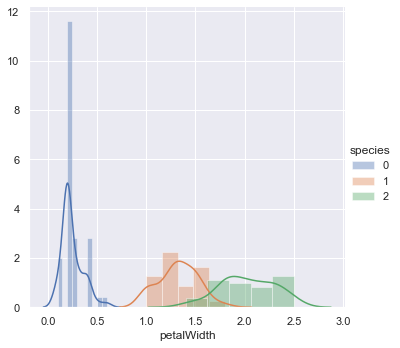

In [19]:
sns.FacetGrid(iris, hue="species", height=5).map(sns.distplot, "sepalLength").add_legend()
sns.FacetGrid(iris, hue="species", height=5).map(sns.distplot, "sepalWidth").add_legend()
sns.FacetGrid(iris, hue="species", height=5).map(sns.distplot, "petalLength").add_legend()
sns.FacetGrid(iris, hue="species", height=5).map(sns.distplot, "petalWidth").add_legend()
plt.show()

- Plot 1 and 2 show that there is a significant amount of overlap between the species on sepal length and width, so it is not an effective Classification feature
- Plot 3 and 4 illustrate that petal length and width is a good Classification feature as it clearly separates the species, the overlap is extremely less (between Versicolor and Virginica) , Setosa is well separated from the rest two
    - If petal length < 2.1, then species is Setosa
    - The point of intersection between pdf curves of Versicolor and Virginica is roughly at 4.8
    - If petal length > 2.1 and petal length < 4.8 then species is Versicolor
    - If petal length > 4.8 then species is Virginica

# Statistical Model

In [20]:
model=sm.OLS(y,X)
res=model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              1267.
Date:                Mon, 06 Dec 2021   Prob (F-statistic):                   3.17e-112
Time:                        01:02:36   Log-Likelihood:                          17.009
No. Observations:                 150   AIC:                                     -26.02
Df Residuals:                     146   BIC:                                     -13.98
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0845      0.049     -1.720      0.088      -0.182       0.013
x2            -0.0236      0.057     -0.415      0.679      -0.136       0.089
x3             0.2249      0.057      3.968      0.000       0.113       0.337
x4             0.5997      0.094      6.392      0.000       0.414       0.785
==============================================================================
Omnibus:                        0.384   Durbin-Watson:                   1.149
Prob(Omnibus):                  0.825   Jarque-Bera (JB):                0.128
Skew:                          -0.026   Prob(JB):                        0.938
Kurtosis:                       3.133   Cond. No.                         50.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Check normal distribution of variables 

## Shapiro-Wilk test

Shapiro-Wilk test is a statistical test for normality. The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

***Null hypothesis:- data was drawn from normal distribution***

***Alternate hypothesis:- data was not drawn from normal distribution***

In [21]:
from scipy.stats import shapiro
for i in df_iris.columns:
    print(f'{i}: {"Not Gaussian: reject null hypothesis" if shapiro(df_iris[i])[1]<0.05 else "Gaussian: fail to reject null hypothesis"}  {shapiro(df_iris[i])}')

sepalLength: Not Gaussian: reject null hypothesis  ShapiroResult(statistic=0.9760899543762207, pvalue=0.010180278681218624)
sepalWidth: Gaussian: fail to reject null hypothesis  ShapiroResult(statistic=0.9849170446395874, pvalue=0.10113201290369034)
petalLength: Not Gaussian: reject null hypothesis  ShapiroResult(statistic=0.8762689232826233, pvalue=7.41295913542217e-10)
petalWidth: Not Gaussian: reject null hypothesis  ShapiroResult(statistic=0.9018341898918152, pvalue=1.680291461525485e-08)


**Only variable 'sepalWidth' is a normal distribution.**

# T-test

***Null hypothesis:- 'sepalWidth' is not significant for identifying an iris flow species(target)***

***Alternate hypothesis:- 'sepalWidth' is significant for identifying an iris flow species(target)***

In [22]:
stats.ttest_ind(X[:,1],y) # Independent t-test - sepalWidth vs target

Ttest_indResult(statistic=27.15303402964298, pvalue=1.4182422887115277e-82)

**The Independent t-test results are significant because p-value is very small. So, we can reject the null hypothesis in support of the alternative hypothesis.**

## T-test of each feature vs target

***Null hypothesis:- Feature is not significant for identifying an iris flow species(target)***

***Alternate hypothesis:- Feature is significant for identifying an iris flow species(target)***

In [23]:
t_test,p=stats.ttest_ind(X,y)
p

array([4.39761393e-149, 1.41824229e-082, 4.03930219e-047, 2.99117550e-002])

In [24]:
for i in range(X.shape[1]):
    t_test,p=stats.ttest_ind(X[:,i],y) # every feature vs target
    if p>0.05:
        print(f"{i}: Not significant feature  (Fail to reject the null hypothesis)")
    else:
        print(f"{i}: Significant feature (Reject null hypothesis)")

0: Significant feature (Reject null hypothesis)
1: Significant feature (Reject null hypothesis)
2: Significant feature (Reject null hypothesis)
3: Significant feature (Reject null hypothesis)


**All input features (sepal length, sepal width, petal length and petal width) are statistically significant in identifying the target variable i.e species of iris flower.**

# Analysis of variance

## One-way ANOVA test
The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean.

***Null hypothesis:- 'sepalWidth' and iris flow species(target) have the same population mean***

***Alternate hypothesis:- 'sepalWidth' and iris flow species(target) don't have the same population mean***

In [25]:
stat,p=stats.f_oneway(X[:,1],y)
print(stat,p)

737.2872570149498 1.418242288711535e-82


In [26]:
alpha=0.05
if p>alpha:
    print("Fail to reject null hypothesis")
else:
    print("Reject null hypothesis")

Reject null hypothesis


## One-way ANOVA tests of each feature vs target

In [27]:
for i in range(X.shape[1]):
    t_test,p=stats.f_oneway(X[:,i],y)
    if p>alpha:
        print(f"{i}: Fail to reject null hypothesis")
    else:
        print(f"{i}: Reject null hypothesis")

0: Reject null hypothesis
1: Reject null hypothesis
2: Reject null hypothesis
3: Reject null hypothesis


# Chi-Squared Test